In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import random

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense , Embedding , Bidirectional , LSTM

lemma = WordNetLemmatizer()

In [ ]:
df = pd.read_csv('Flair_amazon_data.csv')
df

,Unnamed: 0,cleaned_Reviews,Rating
0,0,they look good stick good i dont like rounded ...,-1
1,1,these sticker work like review say they stick ...,1
2,2,these awesome make phone look stylish i used o...,1
3,3,awesome stay look great used multiple apple pr...,1
4,4,these make using home button easy my daughter ...,1
...,...,...,...
80356,80356,get stud studded case beautiful design it wort...,1
80357,80357,i got case texture ive loving ever since i thi...,1
80358,80358,work great like original one i really need ext...,1
80359,80359,great product great packaging high quality app...,1


In [ ]:
df = df.drop(['Unnamed: 0'],1)
df

,cleaned_Reviews,Rating
0,they look good stick good i dont like rounded ...,-1
1,these sticker work like review say they stick ...,1
2,these awesome make phone look stylish i used o...,1
3,awesome stay look great used multiple apple pr...,1
4,these make using home button easy my daughter ...,1
...,...,...
80356,get stud studded case beautiful design it wort...,1
80357,i got case texture ive loving ever since i thi...,1
80358,work great like original one i really need ext...,1
80359,great product great packaging high quality app...,1


In [ ]:
df['Rating'].value_counts()

 1    54429
-1    25923
 0        9
Name: Rating, dtype: int64

In [ ]:
df[df['Rating'] == 0]

,cleaned_Reviews,Rating
3699,NaN,0
6866,NaN,0
17694,NaN,0
28226,NaN,0
33308,NaN,0
51433,NaN,0
53680,NaN,0
55742,NaN,0
62105,NaN,0


In [ ]:
df = df.dropna()

In [ ]:
df[df['Rating'] == 0]

,cleaned_Reviews,Rating


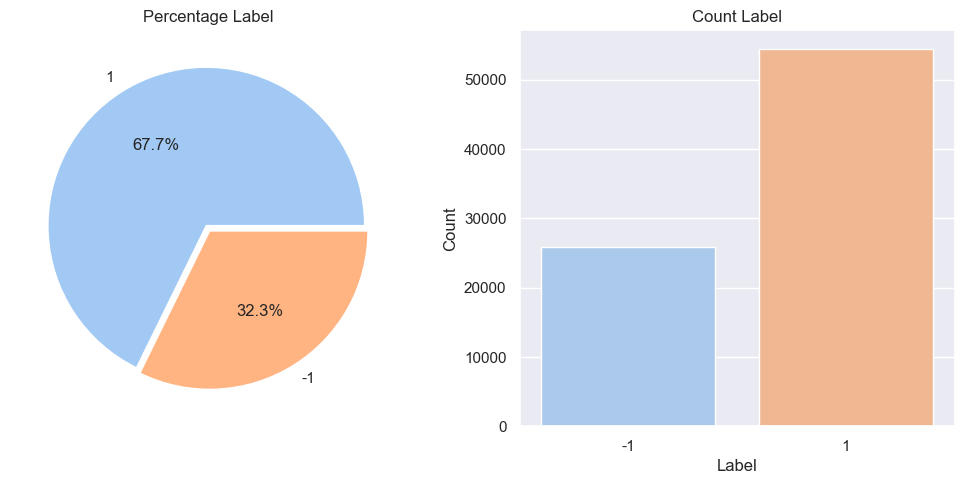

In [ ]:
label_count = df['Rating'].value_counts()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label')

sns.countplot(x = df['Rating'] , ax=axes[1])
axes[1].set_title('Count Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(df['cleaned_Reviews'] , df['Rating'] , train_size = 0.80 , random_state = 42)

In [ ]:
len(x_train) , len(x_test)

(64281, 16071)

In [ ]:
x_train

48917    my husband work construction hard phone yester...
66422    if looking quality screen protector fit perfec...
59183    this little camera cool thing iphone the fish ...
27320    great buy fast reliable service the color vibr...
46540    i zooka i bought nephew not full rich sound zooka
                               ...                        
6266     wa ok last friend i wish lasted never one very...
54893    this product okay the front screen protector g...
76829    good price protects wife phone look good she w...
860      product great leather the back clip made plast...
15797    perfect replacement xoom tableta true replacem...
Name: cleaned_Reviews, Length: 64281, dtype: object

In [ ]:
vec = TfidfVectorizer(max_features=1300)
vec.fit(x_train)
# print("No. of feature words: ",len(vec.get_feature_names()))

TfidfVectorizer(max_features=1300)

In [ ]:
x_train = vec.transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_train.shape , x_test.shape

((64281, 1300), (16071, 1300))

In [ ]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [ ]:
ytrn_prd4 = lr.predict(x_train)

In [ ]:
ytst_Prd4 = lr.predict(x_test)

In [ ]:
trn_acc4 = accuracy_score(ytrn_prd4,y_train)
trn_acc4*100

85.74384343740763

In [ ]:
tst_acc4 = accuracy_score(ytst_Prd4,y_test)
tst_acc4*100

84.67425798021281

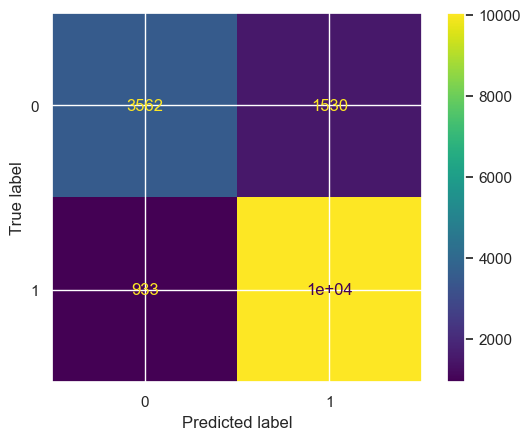

In [ ]:
cm4 = confusion_matrix(y_test,ytst_Prd4)
cm_disp4 = ConfusionMatrixDisplay(confusion_matrix = cm4)
cm_disp4.plot()
plt.show()

Random Forest Classifier

In [ ]:
rnd = RandomForestClassifier()

In [ ]:
rnd.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:

ytrn_prd1 = rnd.predict(x_train)

In [ ]:

ytst_Prd1 = rnd.predict(x_test)


In [ ]:

trn_acc1 = accuracy_score(ytrn_prd1,y_train)
trn_acc1*100

99.99377732144802

In [ ]:

tst_acc1 = accuracy_score(ytst_Prd1,y_test)
tst_acc1*100

83.17466243544273

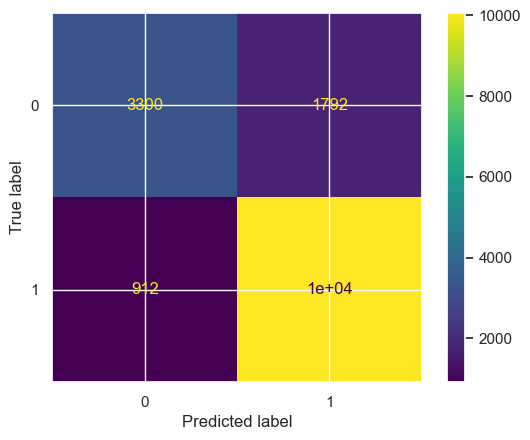

In [ ]:


cm = confusion_matrix(y_test,ytst_Prd1)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_disp.plot()
plt.show()


In [ ]:
print(classification_report(y_test,ytst_Prd1))

              precision    recall  f1-score   support

          -1       0.78      0.65      0.71      5092
           1       0.85      0.92      0.88     10979

    accuracy                           0.83     16071
   macro avg       0.82      0.78      0.80     16071
weighted avg       0.83      0.83      0.83     16071



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC()

In [ ]:
# sv.fit(x_train,y_train)

In [ ]:
# ytrn_prd10 = sv.predict(x_train)

In [ ]:
# ytst_prd10 = sv.predict(x_test)

In [ ]:
# trn_acc10 = accuracy_score(ytrn_prd10,y_train)
# trn_acc10*100

In [ ]:
# tst_acc10 = accuracy_score(ytst_prd10,y_test)
# tst_acc10*100

In [ ]:
# cm10 = confusion_matrix(y_test,ytst_prd10)
# cm_disp10 = ConfusionMatrixDisplay(confusion_matrix = cm10)
# cm_disp10.plot()
# plt.show()

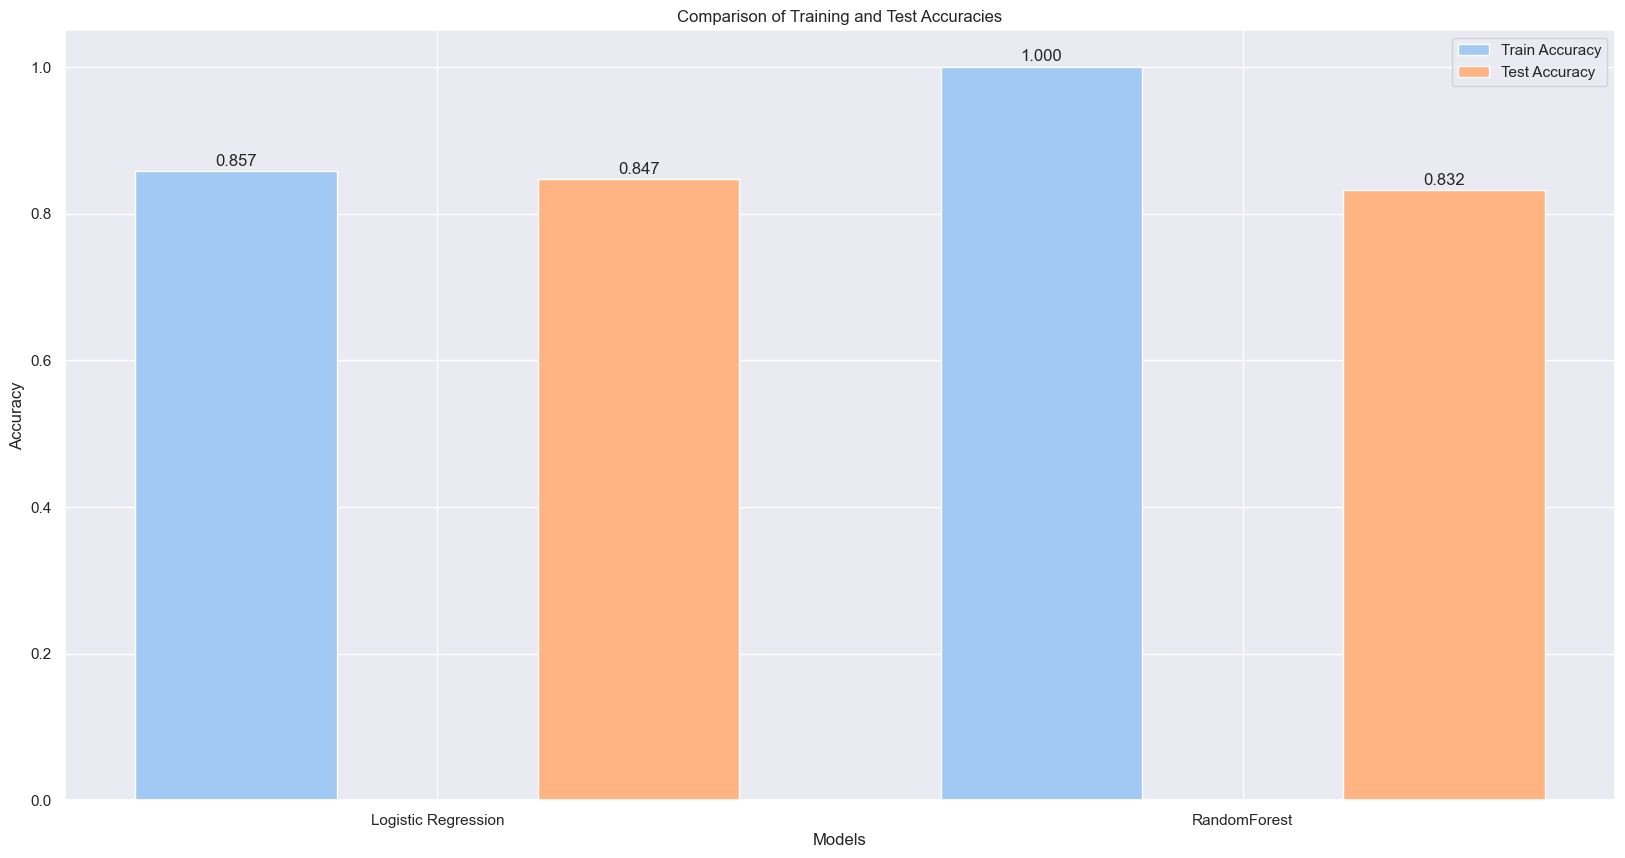

In [ ]:
train_scores=[trn_acc4,trn_acc1] #trn_acc10
test_scores=[tst_acc4,tst_acc1] #tst_acc10

models = ['Logistic Regression','RandomForest'] #

x = np.arange(len(models))

width = 0.25

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width, train_scores, width, label='Train Accuracy')

rects2 = ax.bar(x + width, test_scores, width, label='Test Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Test Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()